In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [7]:
include("src/spiking.jl")
include("src/vsa.jl")

similarity_outer (generic function with 1 method)

In [3]:
using Plots

In [4]:
repeats = 6

6

In [5]:
tspan = (0.0, 1.0 * repeats)

(0.0, 6.0)

In [6]:
n_angles = 101

101

In [9]:
phases = reshape(range(start = -1.0, stop = 1.0, length = n_angles) |> collect, (1, n_angles))

1×101 Matrix{Float64}:
 -1.0  -0.98  -0.96  -0.94  -0.92  -0.9  …  0.9  0.92  0.94  0.96  0.98  1.0

In [15]:
phases = vcat(phases, zero(phases))

2×101 Matrix{Float64}:
 -1.0  -0.98  -0.96  -0.94  -0.92  -0.9  …  0.9  0.92  0.94  0.96  0.98  1.0
  0.0   0.0    0.0    0.0    0.0    0.0     0.0  0.0   0.0   0.0   0.0   0.0

In [16]:
b = bundle(phases, dims=1)

1×101 Matrix{Float64}:
 0.5  -0.49  -0.48  -0.47  -0.46  …  0.45  0.46  0.47  0.48  0.49  -0.5

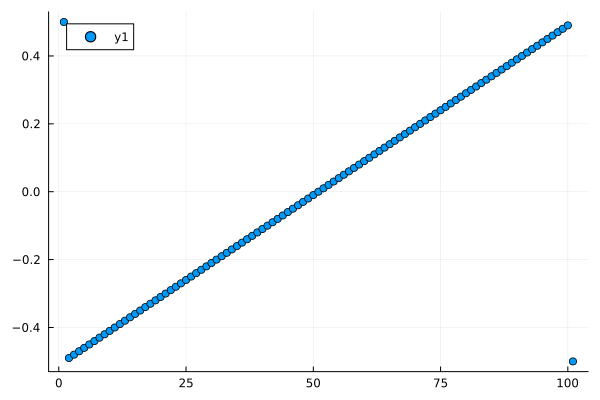

In [41]:
scatter(b |> vec)

In [109]:
spk_args = SpikingArgs()

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.02 (V)


In [110]:
st_p = phase_to_train(phases, spk_args, repeats = repeats)

Spike Train: (2, 101) with 1212 spikes.

In [111]:
using OrdinaryDiffEq

In [112]:
sol_phase = phase_memory(st_p, tspan=tspan, spk_args=spk_args);

In [113]:
u_phase = Array(sol_phase);

In [114]:
normalized = normalize_potential.(u_phase);

In [115]:
normalized |> size

(2, 101, 601)

In [116]:
u_bundle = sum(normalized, dims=1);

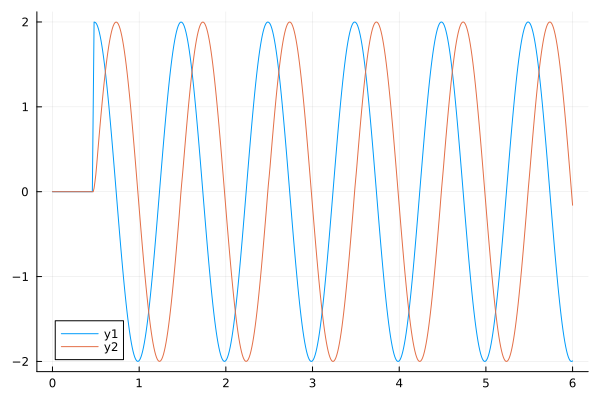

In [154]:
plot(sol_phase.t, real.(u_bundle[1,50,:]))
plot!(sol_phase.t, imag.(u_bundle[1,50,:]))

In [157]:
argmax(imag.(u_bundle[1,50,:]))

575

In [141]:
spk_out = find_spikes_rf(u_bundle, sol_phase.t, spk_args, reverse=false)

(CartesianIndex{2}[CartesianIndex(1, 1), CartesianIndex(1, 2), CartesianIndex(1, 3), CartesianIndex(1, 4), CartesianIndex(1, 5), CartesianIndex(1, 6), CartesianIndex(1, 7), CartesianIndex(1, 8), CartesianIndex(1, 9), CartesianIndex(1, 10)  …  CartesianIndex(1, 91), CartesianIndex(1, 92), CartesianIndex(1, 93), CartesianIndex(1, 94), CartesianIndex(1, 95), CartesianIndex(1, 96), CartesianIndex(1, 97), CartesianIndex(1, 98), CartesianIndex(1, 99), CartesianIndex(1, 100)], [0.25000000000000006, 0.26000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001  …  5.939999999999918, 5.939999999999918, 5.939999999999918, 5.949999999999918, 5.949999999999918, 5.959999999999917, 5.959999999999917, 5.969999999999917, 5.969999999999917, 5.979999999999917])

In [142]:
spk_out[2]

646-element Vector{Float64}:
 0.25000000000000006
 0.26000000000000006
 0.26000000000000006
 0.2700000000000001
 0.2700000000000001
 0.2800000000000001
 0.2900000000000001
 0.3100000000000001
 0.3200000000000001
 0.3300000000000001
 ⋮
 5.939999999999918
 5.939999999999918
 5.949999999999918
 5.949999999999918
 5.959999999999917
 5.959999999999917
 5.969999999999917
 5.969999999999917
 5.979999999999917

In [143]:
train_out = SpikeTrain(spk_out[1], spk_out[2], size(u_bundle)[1:2], spk_args.t_period / 4)

Spike Train: (1, 101) with 646 spikes.

In [144]:
phase_out = train_to_phase(train_out, spk_args);

In [150]:
phase_out[1,:,:]

1×101 Matrix{Float64}:
 -0.52  -0.52  -0.5  -0.5  -0.5  -0.48  …  0.42  0.42  0.44  0.44  0.46  0.46

In [161]:
phase_out[1,:,50]

1-element Vector{Float64}:
 -0.03999999999999915

In [164]:
(mod((sol_phase.t[575] - 0.25), 1.0) - 0.5) * 2

-0.020000000000155893

In [145]:
size(phase_out)

(6, 1, 101)

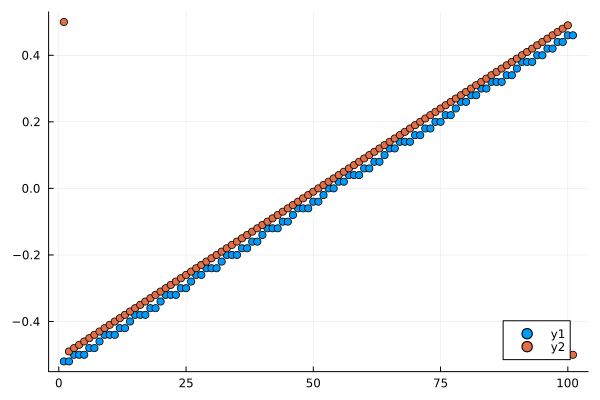

In [146]:
scatter(phase_out[1,:,:] |> vec)
scatter!(b |> vec)

In [147]:
err = vec(phase_out[1,:,:] .- b);

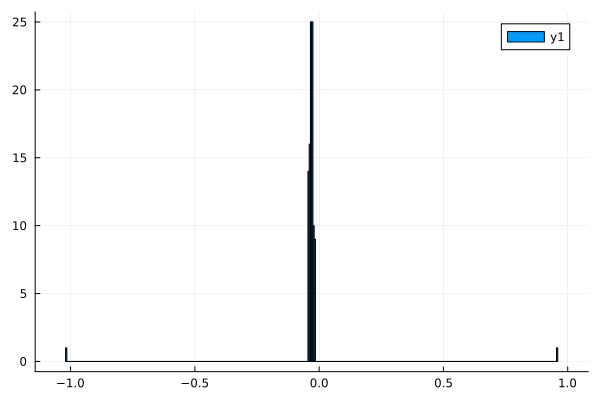

In [148]:
histogram(err)